Gopi Chand Yenikapalli

# Business Scenario:

A new company has entered the market and is looking to increase its sales by launching marketing campaigns to reach potential customers. The company is focused on building its own brand and wants to ensure that it is targeting the audience and ready to spend its maximum marketing budget.

To achieve this, the company plans to use a machine learning model to identify potential customers who are likely to make a purchase on their website. The company has collected data on visitors to their website, including the number of pages viewed, the time spent on the website, the type of visitor, and the location of the visitor.

# 1.0 Setup

In [1]:
# Import all required libraries
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
np.random.seed(1)

C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 2.0 Load the Data

In [2]:
import os
print(os.getcwd())

C:\Users\Gopi Chand\OneDrive - University of South Florida\Desktop\DSP\Assignments\Assignment-1


In [3]:
#Loading the data file
shopping_df = pd.read_csv('online_shoppers_intention.csv')
shopping_df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# 3.0 Explore the given data

In [4]:
# Exploring number of rows and columns
rows = shopping_df.shape[0]
cols = shopping_df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=12330 and Cols=18


In [5]:
#see the column name
shopping_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# Column Descriptions:

1. Administrative: The number of pages of administrative information visited by the user.

2. Administrative_Duration: The total time spent by the user on the administrative pages.

3. Informational: The number of pages of informational content visited by the user.

4. Informational_Duration: The total time spent by the user on the informational pages.

5. ProductRelated: The number of pages of product-related content visited by the user.

6. ProductRelated_Duration: The total time spent by the user on the product-related pages.

7. BounceRates: The percentage of visitors who enter the website and leave without viewing any other pages.

8. ExitRates: The percentage of visitors who leave the website after viewing a page.

9. PageValues: The average value of the pages viewed by the user before the purchase.

10. SpecialDay: The closeness of the visit to a special day like Mother's Day or Valentine's Day.

11. Month: The month of the year when the user visited the website.

12. OperatingSystem: The operating system used by the user.

13. Browser: The browser used by the user.

14. Region: The geographical region of the user.

15. TrafficType: The type of traffic source from which the user arrived at the website.

16. VisitorType: The type of visitor - returning or new.

17. Weekend: A binary value indicating whether the visit occurred on a weekend or not.

18. Revenue: The target variable indicating whether the user made a purchase or not (1 for purchase, 0 for no purchase).

Note that this dataset is a combination of web analytics data and survey data, and the columns represent various attributes of the user's browsing behavior on a large online retailer in Turkey.

In [6]:
#Coverting all column name to Upper alphabtes and replacing space with "_"
shopping_df.columns = [s.strip().upper().replace(' ', '_') for s in shopping_df.columns] 
shopping_df.columns

Index(['ADMINISTRATIVE', 'ADMINISTRATIVE_DURATION', 'INFORMATIONAL',
       'INFORMATIONAL_DURATION', 'PRODUCTRELATED', 'PRODUCTRELATED_DURATION',
       'BOUNCERATES', 'EXITRATES', 'PAGEVALUES', 'SPECIALDAY', 'MONTH',
       'OPERATINGSYSTEMS', 'BROWSER', 'REGION', 'TRAFFICTYPE', 'VISITORTYPE',
       'WEEKEND', 'REVENUE'],
      dtype='object')

In [7]:
shopping_df.dtypes

ADMINISTRATIVE               int64
ADMINISTRATIVE_DURATION    float64
INFORMATIONAL                int64
INFORMATIONAL_DURATION     float64
PRODUCTRELATED               int64
PRODUCTRELATED_DURATION    float64
BOUNCERATES                float64
EXITRATES                  float64
PAGEVALUES                 float64
SPECIALDAY                 float64
MONTH                       object
OPERATINGSYSTEMS             int64
BROWSER                      int64
REGION                       int64
TRAFFICTYPE                  int64
VISITORTYPE                 object
WEEKEND                       bool
REVENUE                       bool
dtype: object

In [8]:
# check for if there is any missing values in remaining columns
shopping_df.isnull().sum()

ADMINISTRATIVE             0
ADMINISTRATIVE_DURATION    0
INFORMATIONAL              0
INFORMATIONAL_DURATION     0
PRODUCTRELATED             0
PRODUCTRELATED_DURATION    0
BOUNCERATES                0
EXITRATES                  0
PAGEVALUES                 0
SPECIALDAY                 0
MONTH                      0
OPERATINGSYSTEMS           0
BROWSER                    0
REGION                     0
TRAFFICTYPE                0
VISITORTYPE                0
WEEKEND                    0
REVENUE                    0
dtype: int64

Here we can see that there are no null values in the dataset. We do not need to fix or replace any null values in the dataset.

In [9]:
# Checking for number of unique values for each feature

uniques = shopping_df.nunique(axis=0)
print(uniques)

ADMINISTRATIVE               27
ADMINISTRATIVE_DURATION    3335
INFORMATIONAL                17
INFORMATIONAL_DURATION     1258
PRODUCTRELATED              311
PRODUCTRELATED_DURATION    9551
BOUNCERATES                1872
EXITRATES                  4777
PAGEVALUES                 2704
SPECIALDAY                    6
MONTH                        10
OPERATINGSYSTEMS              8
BROWSER                      13
REGION                        9
TRAFFICTYPE                  20
VISITORTYPE                   3
WEEKEND                       2
REVENUE                       2
dtype: int64


In this Online Shoppers Purchasing Intention Dataset, the target variable 'Revenue' is a binary variable that indicates whether a customer completed a transaction or not. As we see that, the majority(10,422) of the entries in the dataset have a value of 0 for the 'Revenue' column, indicating that the customer did not make a purchase. This is expected in the context of e-commerce, where a large number of visitors may browse through the website but only a small percentage may actually make a purchase.

# 4.0 Feature Cleaning

Before we begin with the classification, we need to make sure that the data is in the correct format and all features are appropriately adjusted.
1. Convert categorical variables to numerical variables: Some of the features in the dataset are categorical variables, such as 'Month', 'OperatingSystem', 'Browser', 'Region', 'TrafficType', and 'VisitorType'. We need to convert these variables to numerical variables before we can use them in the classification algorithm. This can be done using techniques such as one-hot encoding or label encoding.

In [10]:
monthly = shopping_df['MONTH'].value_counts()
print(monthly)

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: MONTH, dtype: int64


We can see here that the 'MONTH' column is missing January and Apri months

C:\Users\Gopi Chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


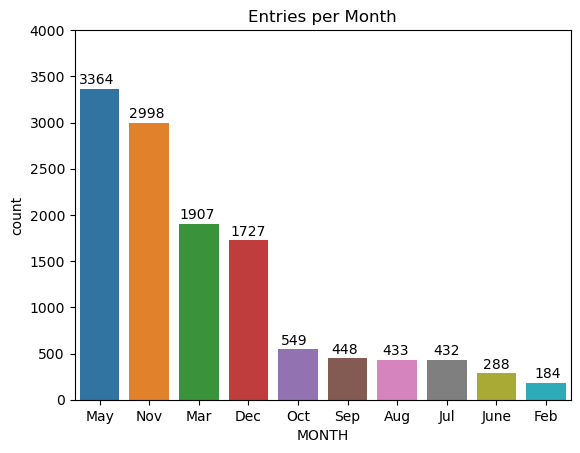

In [11]:
#Explore the distribution of each month:
sns.countplot(shopping_df['MONTH'], order=monthly.index)
plt.title('Entries per Month')
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

we remove the column named 'MONTH'. As it has only 10 different categories, it signifies that two months of data are missing. Moreover, since the number of entries for each month is not equal, it can generate an unfair bias towards classification based on the month.Furthermore, the 'SpecialDay' column already includes time-related information that affects purchasing decisions. Hence, the 'MONTH' column is somewhat redundant.
We can observe from the visual representation that some months have a large number of samples (May, Nov), while a few others have very few samples (Feb, June). Thus, we will exclude this column from further analysis.

In [12]:
#Explore the distribution of Operating System:
os_count = shopping_df['OPERATINGSYSTEMS'].value_counts()
print(os_count)

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OPERATINGSYSTEMS, dtype: int64


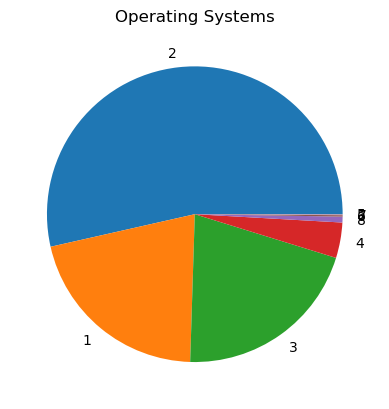

In [13]:
#Explore the distribution of Operating System:
plt.pie(os_count, labels=os_count.index)
plt.title("Operating Systems")
plt.show()

"OperatingSystems" column has been labeled by number ranging from 1 to 8,the majority of users use operating system 2 and low-usage is OS 5. As it may not add significant value to our prediction model.so, dropping this column

C:\Users\Gopi Chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


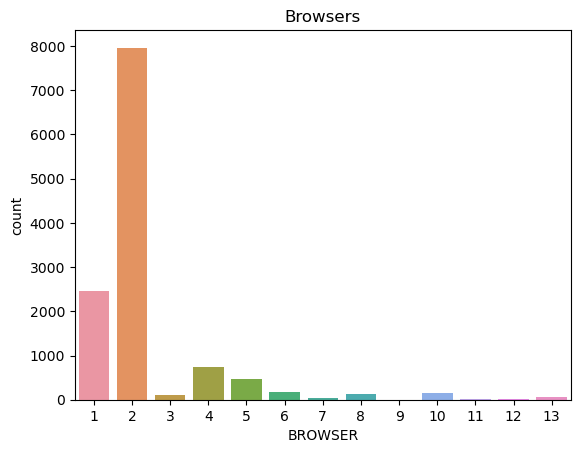

In [14]:
#Explore the distribution of Browser:
sns.countplot(shopping_df['BROWSER'])
plt.title('Browsers')
plt.show()


Majority of users using Browser 2 and 1 and remaining all browers are very very less users. We will drop this column as it does not contribute much to our model.

C:\Users\Gopi Chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


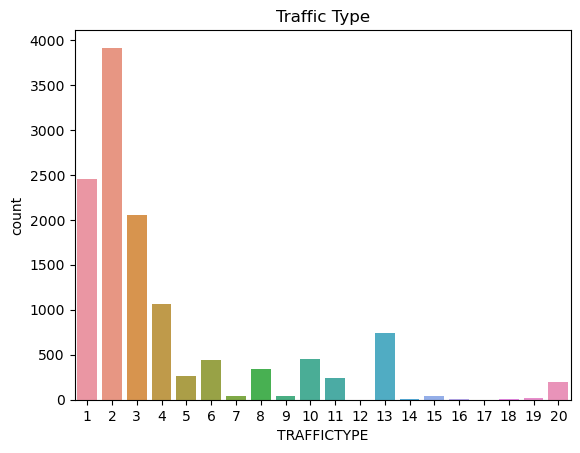

In [15]:
#Explore the distribution of Trafic Type:
sns.countplot(shopping_df['TRAFFICTYPE'])
plt.title('Traffic Type')
plt.show()


The "TrafficType" column is being left out because it may not be very useful in predicting if a user will make a purchase. While this column can help website owners determine the sources of their website traffic, it may not provide significant insights into visitors' purchasing behavior. However, this column can still be helpful in determining where website owners should invest in advertising to attract more visitors to their website.

C:\Users\Gopi Chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


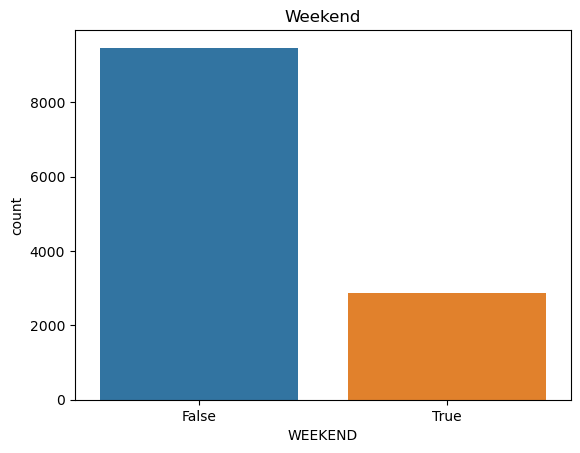

In [16]:
#Explore the distribution of Weekend:
sns.countplot(shopping_df['WEEKEND'])
plt.title('Weekend')
plt.show()


As per the famous article, Best Day of The Week for Online Sales,SaleCycle data found Wednesday and Thursday saw the busiest retail days online for online sales with Saturday being the worst day of the week for online sales. However in most recent findings, Monday has taken the lion’s share of online sales for the last two years in a row. Sunday currently bodes the lowest amount of online sales.The weekend is certainly the quietest time for ecommerce activity, when people have more leisure time and therefore are less likely to be around a device on which they can shop.https://www.salecycle.com/wp-content/uploads/2023/01/coponline-sales-volume-by-day-2022-2-1.png. from the above bar chart we can say majority claas is not weekend.There is weak correlation between days of the week and online shopping. asserts that Sundays and Mondays have the highest traffic for eCommerce. dropping this column too

C:\Users\Gopi Chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


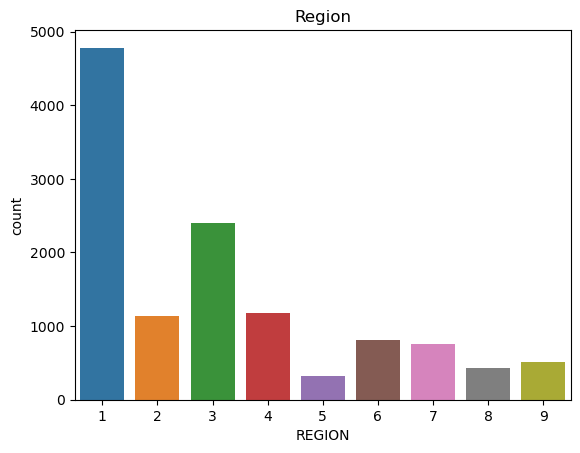

In [17]:
#Explore the distribution of Region:
sns.countplot(shopping_df['REGION'])
plt.title('Region')
plt.show()

The "Region" column is being excluded from the features because while regional location may be somewhat related to the likelihood of a purchase, it's not a significant factor in the purchasing behavior of visitors. Therefore, in order to simplify the model and use a smaller set of features, the "Region" column is being left out.

In [18]:
#Some of the variables aren't predictors; therefore we drop them
shopping_df = shopping_df.drop(columns=['REGION', 'WEEKEND','TRAFFICTYPE','BROWSER','OPERATINGSYSTEMS','MONTH'])

#### Encoding varibles-Label and One Hot Encoding

In [19]:
dummies_df = pd.get_dummies(shopping_df['VISITORTYPE'], prefix='VISITORTYPE', drop_first=False)
shopping_df = shopping_df.join(dummies_df)
shopping_df.drop('VISITORTYPE', axis=1, inplace = True)

In [20]:
labelencoder = LabelEncoder()
shopping_df['REVENUE'] = labelencoder.fit_transform(shopping_df['REVENUE'])

In [21]:
# explore the dataframe columns to verify encoding and dropped columns
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ADMINISTRATIVE                 12330 non-null  int64  
 1   ADMINISTRATIVE_DURATION        12330 non-null  float64
 2   INFORMATIONAL                  12330 non-null  int64  
 3   INFORMATIONAL_DURATION         12330 non-null  float64
 4   PRODUCTRELATED                 12330 non-null  int64  
 5   PRODUCTRELATED_DURATION        12330 non-null  float64
 6   BOUNCERATES                    12330 non-null  float64
 7   EXITRATES                      12330 non-null  float64
 8   PAGEVALUES                     12330 non-null  float64
 9   SPECIALDAY                     12330 non-null  float64
 10  REVENUE                        12330 non-null  int64  
 11  VISITORTYPE_New_Visitor        12330 non-null  uint8  
 12  VISITORTYPE_Other              12330 non-null 

In [22]:
shopping_df.head()

,ADMINISTRATIVE,ADMINISTRATIVE_DURATION,INFORMATIONAL,INFORMATIONAL_DURATION,PRODUCTRELATED,PRODUCTRELATED_DURATION,BOUNCERATES,EXITRATES,PAGEVALUES,SPECIALDAY,REVENUE,VISITORTYPE_New_Visitor,VISITORTYPE_Other,VISITORTYPE_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,0,0,1


In [23]:
shopping_df.columns

Index(['ADMINISTRATIVE', 'ADMINISTRATIVE_DURATION', 'INFORMATIONAL',
       'INFORMATIONAL_DURATION', 'PRODUCTRELATED', 'PRODUCTRELATED_DURATION',
       'BOUNCERATES', 'EXITRATES', 'PAGEVALUES', 'SPECIALDAY', 'REVENUE',
       'VISITORTYPE_New_Visitor', 'VISITORTYPE_Other',
       'VISITORTYPE_Returning_Visitor'],
      dtype='object')

# 5.0 Split data (train/test)

In [24]:
y = shopping_df.pop('REVENUE')
X = shopping_df

In [25]:
# split the data into validation and training set
#df_train, df_test = train_test_split(shopping_df, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
#target = 'REVENUE'
#predictors = list(shopping_df.columns)
#predictors.remove(target)

### 5.1  Conduct any data prepartion that should be done *AFTER* the data split

We will look at the following:
1) imput any missing numeric values using the mean of the variable/column

2) remove differences of scale by standardizing the numerical variables

3) check for data imblance

We already checked for any missing value. In our data there is set no missings values. so we don't need to do any imput.

In [26]:
#standardizing the numerical variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Checking for data imblance 
y_train.value_counts()

0    7273
1    1358
Name: REVENUE, dtype: int64

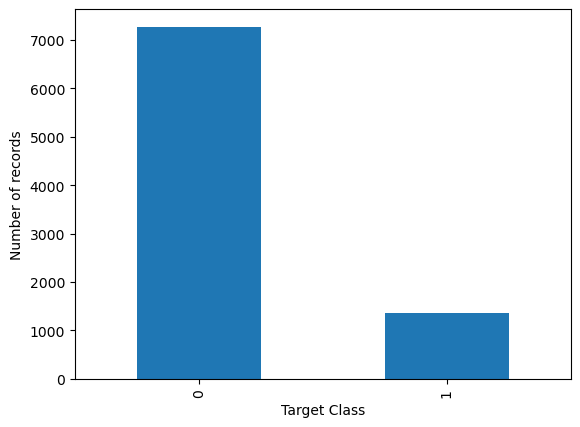

In [28]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [29]:
#Oversampling to balance data 
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

0    7273
1    7273
Name: REVENUE, dtype: int64

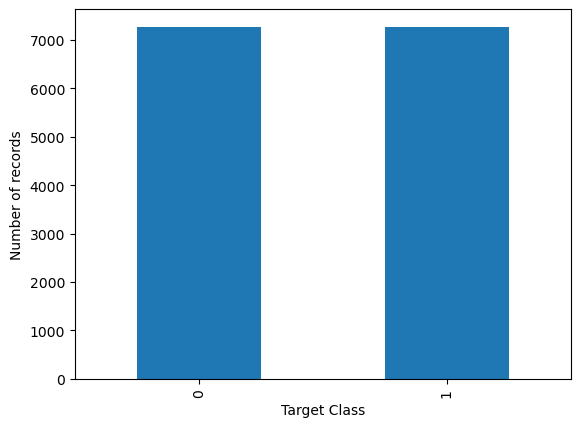

In [30]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# 6.0 Save the Data

In [31]:
# convert the numpy array to a pandas DataFrame
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [32]:
# save the DataFrame to a CSV file
X_train.to_csv('shopping_X_train.csv', index=False)
y_train.to_csv('shopping_y_train.csv', index=False)
X_test.to_csv('shopping_X_test.csv', index=False)
y_test.to_csv('shopping_y_test.csv', index=False)

Data files saved successfully